# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import math

In [11]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [12]:
athletes = pd.read_csv("athletes.csv", parse_dates=['dob'])

In [13]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [14]:
# Sua análise começa aqui.
df = athletes

In [15]:
df.shape

(11538, 11)

In [22]:
df.head(10)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,2069-10-17,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0
5,173071782,Aaron Royle,AUS,male,1990-01-26,1.80,67.0,triathlon,0,0,0
6,266237702,Aaron Russell,USA,male,1993-06-04,2.05,98.0,volleyball,0,0,1
7,382571888,Aaron Younger,AUS,male,1991-09-25,1.93,100.0,aquatics,0,0,0
8,87689776,Aauri Lorena Bokesa,ESP,female,1988-12-14,1.80,62.0,athletics,0,0,0
9,997877719,Ababel Yeshaneh,ETH,female,1991-07-22,1.65,54.0,athletics,0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [14]:
df.sample(15)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
790,294664221,Andreea Aanei,ROU,female,11/18/93,1.70,120.0,weightlifting,0,0,0
1337,467627104,Barna Bor,HUN,male,12/12/86,1.91,130.0,judo,0,0,0
9309,788805861,Ryan Held,USA,male,6/27/95,NaN,NaN,aquatics,1,0,0
10660,737278135,Tyler Martin,AUS,male,6/28/90,1.96,98.0,aquatics,0,0,0
10934,365006989,Volha Ziuzkova,BLR,female,6/14/83,1.71,69.0,basketball,0,0,0
6874,610975661,Mariano Canepa,ARG,male,5/7/87,1.85,98.0,handball,0,0,0
4790,240137595,Jeremy Desplanches,SUI,male,8/7/94,1.89,73.0,aquatics,0,0,0
3288,775503680,Fanny Deberghes,FRA,female,2/21/94,1.70,65.0,aquatics,0,0,0
6392,803793188,Ludger Beerbaum,GER,male,8/26/63,1.90,85.0,equestrian,0,0,1
4121,441329153,Hiromi Miyake,JPN,female,11/18/85,1.45,48.0,weightlifting,0,0,1


In [32]:
df.resample('Y', on='dob').sum()['gold'].sort_values(ascending=False).head(10)

dob
1988-12-31    65
1994-12-31    55
1990-12-31    53
1989-12-31    51
1991-12-31    50
1993-12-31    49
1985-12-31    47
1992-12-31    46
1986-12-31    39
1995-12-31    37
Name: gold, dtype: int64

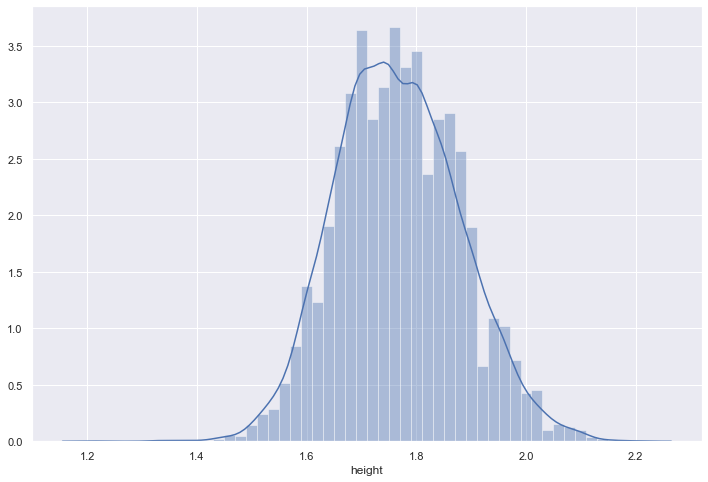

In [17]:
sns.distplot(df['height'])
plt.show()

In [20]:
# Questão 01

sample1 = get_sample(df, 'height', n=3000)
sample1.head()

1811     1.79
7962     1.81
10280    1.83
317      1.68
6989     2.01
Name: height, dtype: float64

In [41]:
pvalue = sct.shapiro(sample1)
if pvalue[1] < 0.05:
    print('False')
else:
    print('True')

False


In [18]:
# Questão 3
sample3 = get_sample(df, 'weight', n=3000)
if sct.normaltest(sample3)[1] <0.05:
    print(True)
else:
    print(False)

True


In [42]:
# Questão 4
sample3 = get_sample(df, 'weight', n=3000)
logTrans = np.array([*map(lambda x: math.log(x, 10), sample3.values)])
if sct.normaltest(logTrans)[1] < 0.05:
    print(False)
else:
    print(True)

False


In [68]:
# Questão 5
bra = df[df['nationality'] == 'BRA']
usa = df[df['nationality'] == 'USA']
can = df[df['nationality'] == 'CAN']

pvalue = sct.ttest_ind(bra['height'].dropna(), usa['height'].dropna(), equal_var=False)[1]
if pvalue < 0.05:
    print(False)
else:
    print(True)

False


In [69]:
# Questão 6
bra = df[df['nationality'] == 'BRA']
usa = df[df['nationality'] == 'USA']
can = df[df['nationality'] == 'CAN']

pvalue = sct.ttest_ind(bra['height'].dropna(), can['height'].dropna(), equal_var=False)[1]
if pvalue < 0.05:
    print(False)
else:
    print(True)

True


In [93]:
# Questão 7
bra = df[df['nationality'] == 'BRA']
usa = df[df['nationality'] == 'USA']
can = df[df['nationality'] == 'CAN']

pvalue = sct.ttest_ind(usa['height'].dropna(), can['height'].dropna(), equal_var=False)[1]
round(pvalue, 8)

0.00046601

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [42]:
def q1():
    sample1 = get_sample(df, 'height', n=3000)
    pvalue = sct.shapiro(sample1)
    if pvalue[1] < 0.05:
        return False
    else:
        return True

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

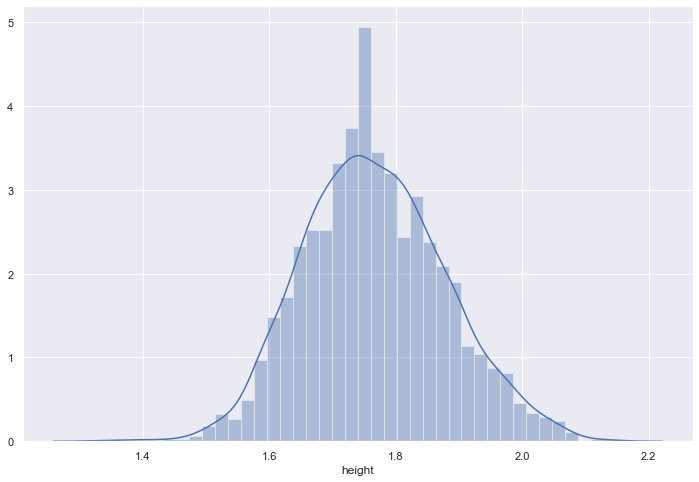

In [22]:
sns.distplot(sample1)
plt.show()

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [2]:
def q2():
    sample2 = get_sample(df, 'height', n=3000)
    pvalue = sct.jarque_bera(sample2)
    if pvalue[1] < 0.05:
        return False
    else:
        return True
    pass

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [19]:
def q3():
    sample3 = get_sample(df, 'weight', n=3000)
    if sct.normaltest(sample3)[1] <0.05:
        return False
    else:
        return True

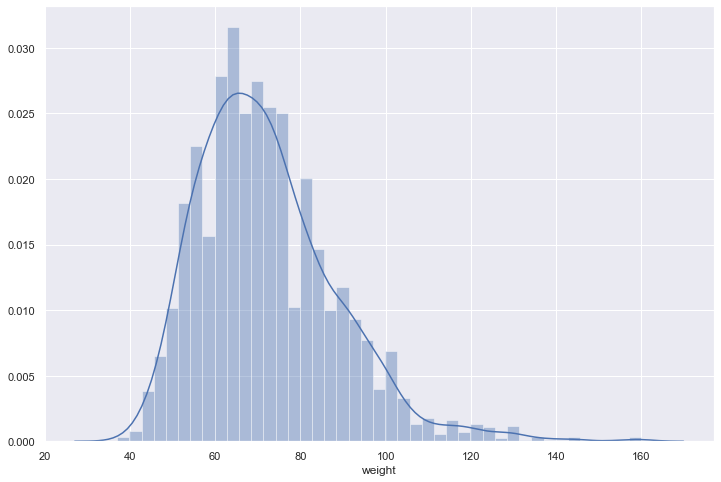

In [24]:
sns.distplot(sample3)
plt.show()

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [43]:
def q4():
    sample3 = get_sample(df, 'weight', n=3000)
    logTrans = np.array([*map(lambda x: math.log(x, 10), sample3.values)])
    if sct.normaltest(logTrans)[1] < 0.05:
        return False
    else:
        return True

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

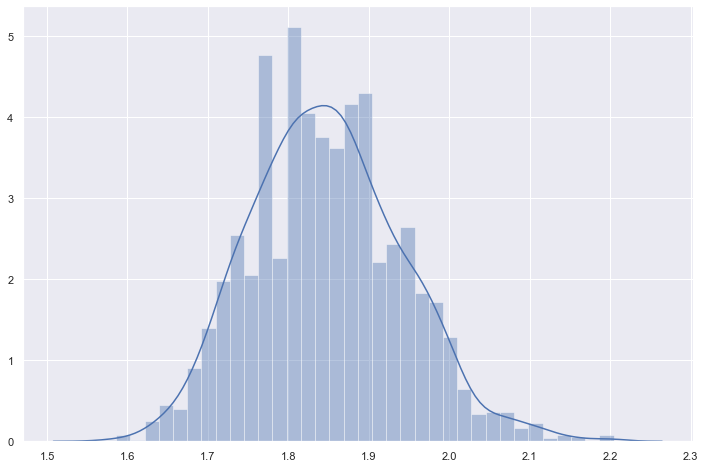

In [44]:
sns.distplot(logTrans)
plt.show()

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [71]:
def q5():
    bra = df[df['nationality'] == 'BRA']
    usa = df[df['nationality'] == 'USA']
    can = df[df['nationality'] == 'CAN']
    
    pvalue = sct.ttest_ind(bra['height'].dropna(), usa['height'].dropna(), equal_var=False)[1]
    if pvalue < 0.05:
        return False
    else:
        return True

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [74]:
def q6():
    bra = df[df['nationality'] == 'BRA']
    usa = df[df['nationality'] == 'USA']
    can = df[df['nationality'] == 'CAN']
    
    pvalue = sct.ttest_ind(bra['height'].dropna(), can['height'].dropna(), equal_var=False)[1]
    if pvalue < 0.05:
        return False
    else:
        return True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [76]:
def q7():
    bra = df[df['nationality'] == 'BRA']
    usa = df[df['nationality'] == 'USA']
    can = df[df['nationality'] == 'CAN']
    
    pvalue = sct.ttest_ind(usa['height'].dropna(), can['height'].dropna(), equal_var=False)[1]
    return round(pvalue, 8)

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?